In [15]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
# Define a random seed to reproduce any random process
rs = 123

In [17]:
# Read datast in csv format
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/tumor.csv"
tumor_df = pd.read_csv(dataset_url)

In [18]:
tumor_df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [19]:
tumor_df.columns

Index(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [20]:
X = tumor_df.drop("Class", axis="columns")
y = tumor_df["Class"]

In [21]:
X.describe()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [22]:
y.value_counts(normalize=True)

0    0.650073
1    0.349927
Name: Class, dtype: float64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

In [24]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, y_train.ravel())
predictions = knn.predict(X_test)




In [25]:
def evaluate_metrics(y_true, predictions):
  classification_score = classification_report(y_true, predictions)
  accuracy = accuracy_score(y_true, predictions)
  f1 = f1_score(y_true, predictions)
  precision_recall_fscore_support_score = precision_recall_fscore_support(y_true, predictions)
  precision = precision_score(y_true, predictions)
  recall = recall_score(y_true, predictions)
  matrix = confusion_matrix(y_true, predictions)

  return classification_score,accuracy,f1,precision_recall_fscore_support_score,precision,recall,matrix


In [26]:
classification_score,accuracy,f1,precision_recall_fscore_support_score,precision,recall,matrix = evaluate_metrics(y_test, predictions)

##Exercise

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train.ravel())
predictions = knn.predict(X_test)


classification_score,accuracy,f1,precision_recall_fscore_support_score,precision,recall,matrix = evaluate_metrics(y_test, predictions)

In [27]:
f1_scores = []

for k in range(1, 50):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the classifier
    knn = knn.fit(X_train, y_train.values.ravel())
    preds = knn.predict(X_test)
    # Evaluate the classifier with f1score
    f1 = f1_score(preds, y_test)
    f1_scores.append((k, round(f1_score(y_test, preds), 4)))
# Convert the f1score list to a dataframe
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
f1_results.set_index('K')

,F1 Score
K,
1,0.9485
2,0.9130
3,0.9485
4,0.9583
5,0.9691
6,0.9583
7,0.9583
8,0.9474
9,0.9474


Text(0.5, 1.0, 'KNN F1 Score')

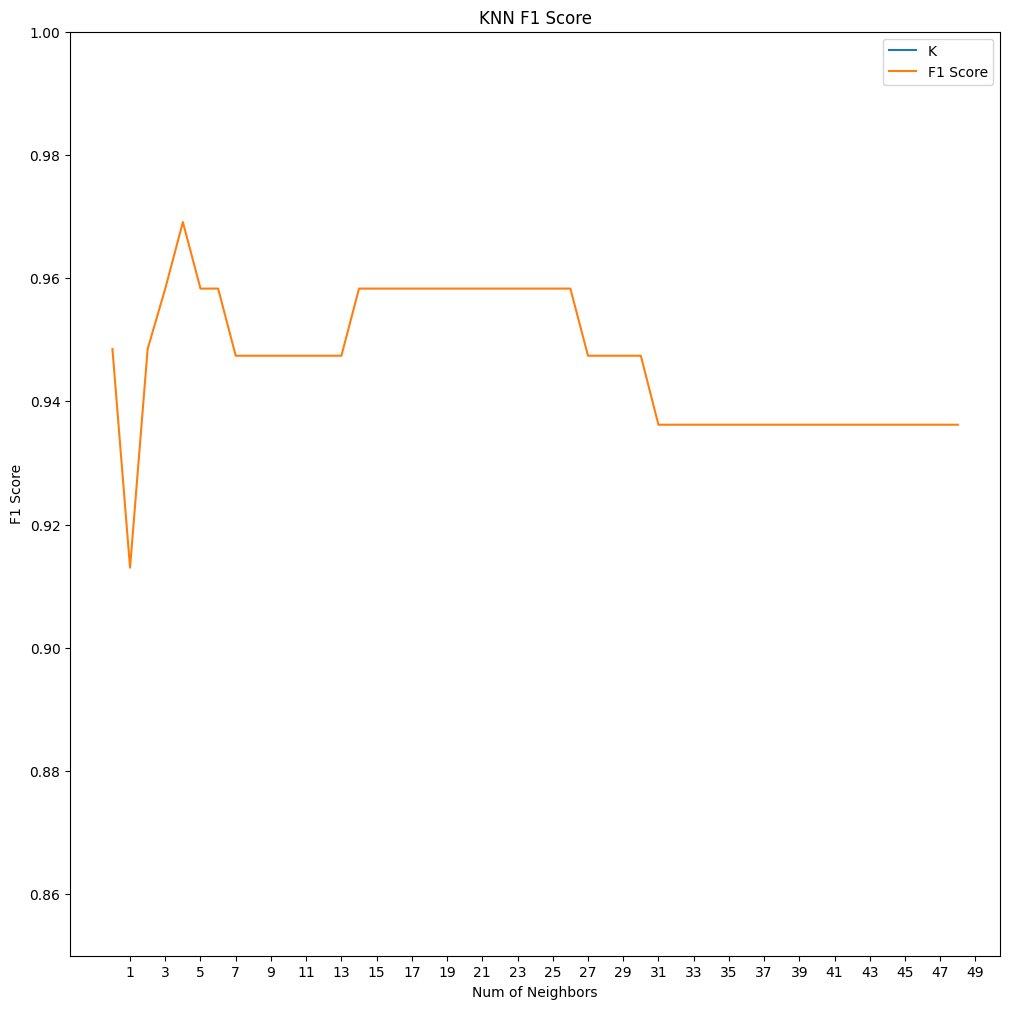

In [29]:
# Plot F1 results
ax = f1_results.plot(figsize=(12, 12))
ax.set(xlabel='Num of Neighbors', ylabel='F1 Score')
ax.set_xticks(range(1, 50, 2));
plt.ylim((0.85, 1))
plt.title('KNN F1 Score')